# The European Football Database



## 1. Introduction

The data give information on the matches played in 11 different European leagues over 8 years (from the 2008/2009 season to the 2015/2016 season).
Most of the leagues consist of 20 teams (for example the German league consists of 18 teams) which play 2 matches against each other (one home and one away).  In other words, each team plays a total of 38 matches in one season.

A team wins 3 points with each win, 1 point after a draw and wins nothing after a defeat. 
The team with the most points at the end of the season wins the league. In case of a tie in points between two (or more) teams, the champion is chosen according to the specific rules of each league. For example in Spain, the champion is the winner of the direct matches between the teams concerned.

At the end of a season, the 2 worst performing teams are replaced by the 2 best teams of the second division league.
The team ranked 18th plays against the 3rd of second division. The winner plays in first division and the loser plays in second division.

In [27]:
import problem
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import problem

X_train, y_train = problem.get_train_data()
X_test, y_test = problem.get_test_data()
X_train.columns

Index(['stage', 'date', 'home_team_api_id', 'away_team_api_id',
       'home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4',
       'home_player_X5', 'home_player_X6', 'home_player_X7', 'home_player_X8',
       'home_player_X9', 'home_player_X10', 'home_player_X11',
       'away_player_X1', 'away_player_X2', 'away_player_X3', 'away_player_X4',
       'away_player_X5', 'away_player_X6', 'away_player_X7', 'away_player_X8',
       'away_player_X9', 'away_player_X10', 'away_player_X11',
       'home_player_Y1', 'home_player_Y2', 'home_player_Y3', 'home_player_Y4',
       'home_player_Y5', 'home_player_Y6', 'home_player_Y7', 'home_player_Y8',
       'home_player_Y9', 'home_player_Y10', 'home_player_Y11',
       'away_player_Y1', 'away_player_Y2', 'away_player_Y3', 'away_player_Y4',
       'away_player_Y5', 'away_player_Y6', 'away_player_Y7', 'away_player_Y8',
       'away_player_Y9', 'away_player_Y10', 'away_player_Y11', 'B365H',
       'B365D', 'B365A', 'BWH', 'BWD', 'BWA

In [22]:
y_test.value_counts()

0    2953
1    1993
2    1705
dtype: int64

## 2. Description of the columns

Now, time to present the features we have, in the `X` dataframe.

### 2.1. Non-discriminative variables: 

- `date`: date of the match

- `stage` : means the order of the match within the season. Goes from 1 to 38

- `home_team_api_id`: id of the home team

- `away_team_api_id`: id of the visitor team

### 2.2. Discriminative variables:

- `home_player_Xi`, `home_player_Yi`, `away_player_Xi`, `away_player_Yi`: X/Y coordinate for the i-th player of the home/away team in the field, at the beginning of the match

- `B365H`: Bet factor favouring home team win according to B365 betting website

- `B365A`: Bet factor favouring away team win according to B365 betting website

- `B365D`: Bet factor favouring a draw according to B365 betting website

- Same goes when we replace `B365` with: `BW`, `IW`, `LB`, `PS`, `WH`, `SJ`, `VC`, `GB` and `SH`.

### 2.3. Target categories

There are 3 possible classes, corresponding to the 3 possible outcomes of a match.

- `0`; home team wins

- `1`: away team wins

- `2`: draw match, none of the teams wins

## 3. Exploratory Data Analysis

We'll do here some plots, as seen in the Stars challenge

In [30]:
# Visualisation selon les variables :
    
colors = ['r', 'b', 'g']
labels = [0,1,2]

def plot_classwise_normalized(feature, bins=None):
    if bins is None:
        bins = np.linspace(X_train[feature].min()-1, X_train[feature].max()+1, 10)
    for label, color in zip(labels, colors):
        plt.hist(X_train[y_train == label][feature].values, density=False, bins=bins, 
                 alpha=0.8, color=color)
        plt.xlabel(feature)

def plot_classwise_scatter(feature1, feature2, range1=None, range2=None):
    if range1 is None:
        range1 = [X_train[feature1].min(), X_train[feature1].max()]
    if range2 is None:
        range2 = [X_train[feature2].min(), X_train[feature2].max()]
    for label, color in zip(labels, colors):
        plt.xlim(range1[0], range1[1])
        plt.ylim(range2[0], range2[1])
        plt.scatter(X_train[y_train == label][feature1], 
                    X_train[y_train == label][feature2],
            alpha=0.3, s=80, c=color, marker='.')

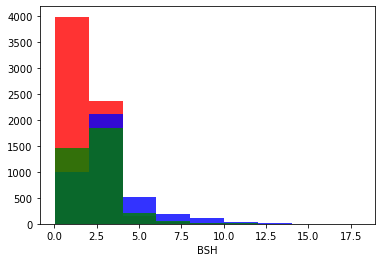

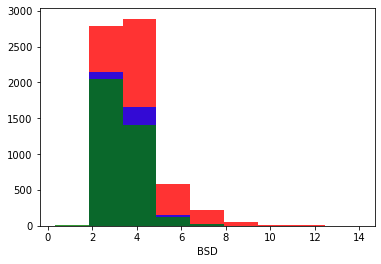

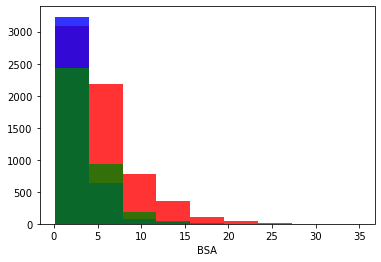

In [31]:
features = ["BSH","BSD","BSA"]
for feature in features :
    plt.figure()
    plot_classwise_normalized(feature)

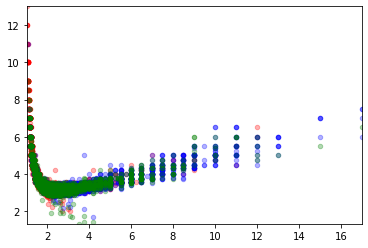

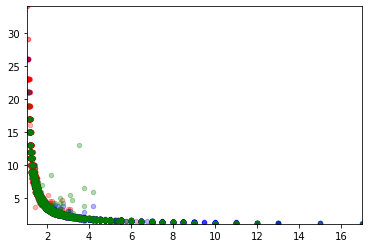

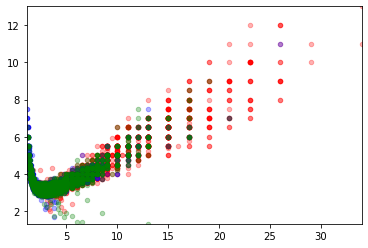

In [25]:
plt.figure()
plot_classwise_scatter("BSH","BSD")
plt.figure()
plot_classwise_scatter("BSH","BSA")
plt.figure()
plot_classwise_scatter("BSA","BSD")

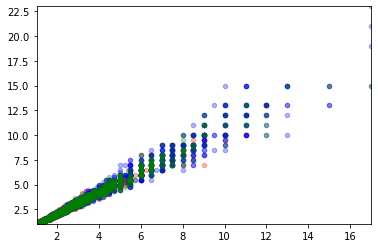

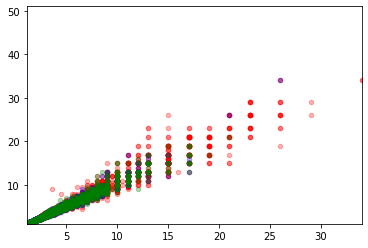

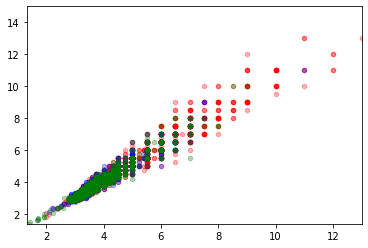

In [26]:
plt.figure()
plot_classwise_scatter("BSH", "B365H")
plt.figure()
plot_classwise_scatter("BSA", "B365A")
plt.figure()
plot_classwise_scatter("BSD", "B365D")

## 4. Explanation of the challenge

The goal is to predict the outcome of a match, given the data we have. We make the (strong) hypothesis the outcome of the match depends only on the columns given. But one can compute aggregated features using the previous columns, as they are ordered chronologically, using the wonderful `sklearn`'s `FunctionTransformer`s.

### Example of pipeline with a Random Forests classifier

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

cols = X_train.columns.drop('date')

transformer = make_column_transformer(
    ('passthrough', cols)
)

pipe = make_pipeline(
    transformer,
    SimpleImputer(strategy='most_frequent'),
    RandomForestClassifier(max_depth=3, n_estimators=20)
)

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.5104495564576755


## 5. Submission

To submit your code, you can refer to the online documentation.